# Yelp Reviews Sentiment Analysis

In this notebook, we will perform text analysis on the reviews submitted to anonymous businesses on Yelp.

We will extract different features from text data using Spacy and perform Sentiment Analysis using Flair.

The dataset is downloaded from Kaggle. Here is the <a href = "https://www.kaggle.com/vivekhn/yelp-reviews"> download link</a>

## Text Analysis
- Parts of Speech Tagging
- Lemmitization
- Removing Stopwords
- NER
- Dependency Parsing

## Flair Sentiment Analysis
- Loading a model
- Unsupervised Sentiment Analysis

In [1]:
!unzip yelp

Archive:  yelp.zip
  inflating: yelp.csv                


## Importing the packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [3]:
# Reading the data
yelp_df = pd.read_csv('yelp.csv')

In [4]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
yelp_df['business_id'].nunique()

4174

In [9]:
# Max of 'cool' is 77. Let's look at that data
yelp_df[yelp_df['cool'] == 77]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
4957,gqLWBFxOKag8dXwVxEvTrg,2011-10-03,1kc50TqtMsIHDGR8yQgF8g,5,Love this place! Amazing Happy Hour Specials!!,review,73eZuIuXVD5sif7GrIMfuQ,77,76,0


In [10]:
# Max of 'funny' is 57. Let's look at that data
yelp_df[yelp_df['funny'] == 57]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9634,1NZLxU5WvB5roPFzneAlLw,2008-09-19,nQHI2kQElYrMWrPBqdwE4w,4,Scary things to me:\nParis Hilton has a career...,review,C8ZTiwa7qWoPSMIivTeSfw,38,38,57


## Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


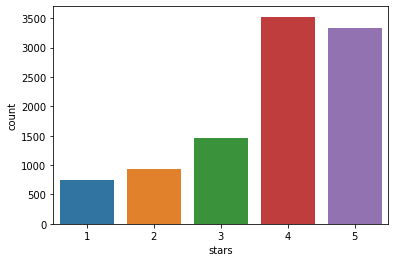

In [11]:
sns.countplot(yelp_df['stars'])

A lot of reviews are positive with 4 or 5 stars

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


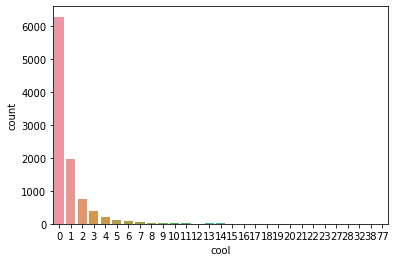

In [12]:
sns.countplot(yelp_df['cool'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


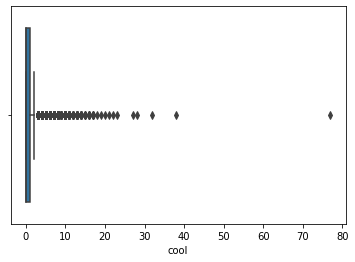

In [13]:
sns.boxplot(yelp_df['cool'])

In [14]:
yelp_df['cool'].max()

77

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


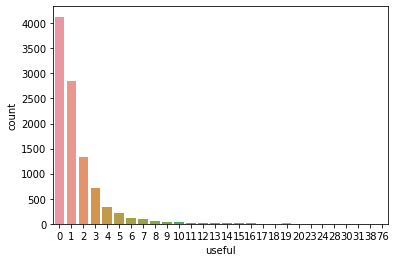

In [15]:
sns.countplot(yelp_df['useful'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


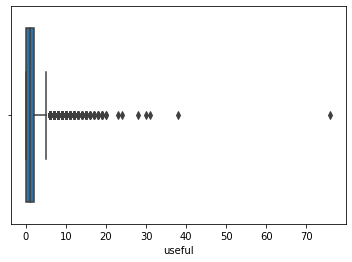

In [16]:
sns.boxplot(yelp_df['useful'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


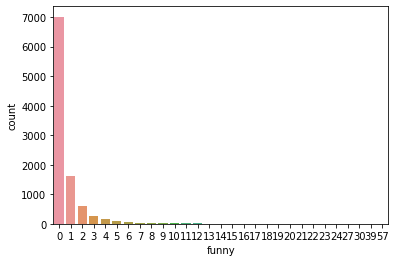

In [17]:
sns.countplot(yelp_df['funny'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


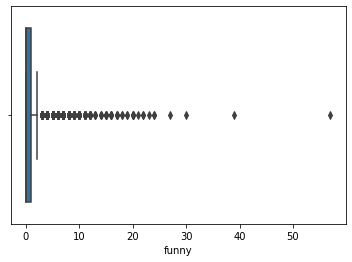

In [18]:
sns.boxplot(yelp_df['funny'])

## Top funny, useful, cool reviews

### Funny

In [19]:
yelp_df['funny'].sort_values(ascending=False).head()

9634    57
180     39
778     30
556     27
6495    24
Name: funny, dtype: int64

In [20]:
print(yelp_df.loc[57,"text"])

This would most certainly be "my" coffee shop if I hadn't already established myself as a regular at another local shop. This brand-new, independent coffee shop has spent the money to look really nice (it even has a fountain inside!).

But what money can't buy is community and unfortunately this shop doesn't seem to have much of that. Granted, building community takes time and/or energy. For their sake, I really really hope it works out in the long-run.


In [21]:
print(yelp_df.loc[39,"text"])

Decor  functional 
Staff friendly and are really kind to our toddler
food rocks  within my  limited range of  red and yellow curries ( so much so they suggested I try something else, hey it's not my fault these are so good that I didn't want to risk anything lesser. 

Prices are a bargain for entrees,  spice is there, they really get the request to make it very very hot.   This is probably the best bargain  in North Phoenix for  spice hounds


In [22]:
print(yelp_df.loc[30,"text"])

Disclaimer: Like many of you, I am a sucker for charming little homes that have been re-purposed into restaurants. I am certain that this colored my opinion of Cibo.

That being said, I absolutely love having lunch here the other day. I unknowingly arrived at 2:05 (5 minutes after they close between lunch and dinner) but was served anyway. I had the salscicia sandwich and a side of fruit. The sandwich was excellent, served on perfectly crisp, chewy saltimbocca bread. The sausage was flavorful and was complimented by roasted red peppers and onions. All this was finished off with a great quality mozzarella cheese. Really, really delicious.

I should also say that the atmosphere here was friendly and  comfortable, though a bit small. This would be a great place to hang out if you lived nearby.


### Cool

In [23]:
yelp_df['cool'].sort_values(ascending=False).head()

4957    77
9634    38
9843    32
180     28
6495    27
Name: cool, dtype: int64

In [24]:
print(yelp_df.loc[77,"text"])

Great prices, great food. The staff is very friendly... I'll definitely be coming back here for lunch on a more regular basis. I had the kung pao, and the portions were incredible for the $5 I paid. 

Not mind blowing, but better than most Chinese places I've been to in the Valley.


In [25]:
print(yelp_df.loc[38,"text"])

This Mexican food is very simple, slightly bland, but fairly fresh. The chicken is chopped up into tofu-looking squares. But I was satisfied with the food, which was fairly healthy Mexican food as Mexican food goes. The staff is quite polite. I met some cool people hanging out there while I sat outside.


In [26]:
print(yelp_df.loc[32,"text"])

Never having dealt with a Discount Tire in Phoenix before (only in Texas, and their service has been great all the time), I came in not knowing what kind of service to expect. I was pleasantly surprised! The store had a good amount of parking, and the store front was clean, open and had adequate seating around the perimeters. There were already 5-6 people sitting and waiting for their cars to be finished, and 2 people waiting infront of me to see a representative. All the guys working there were busy helping someone, yet were saying hello to us and reassuring they'd get to us very soon. I didn't wait an unneccesary amount of time and then was helped by Wally. He inspected my tires, recommended a plan of action gave me options, and we headed back into the store. After I made my decision to replace 2 of the tires, he checked their stock, and unfortunately they didn't have them there. BUT he called another store and had them picked up for the next morning, so I could just come back the ne

### Useful

In [27]:
yelp_df['useful'].sort_values(ascending=False).head()

4957    76
9634    38
6495    31
9843    30
180     28
Name: useful, dtype: int64

In [28]:
print(yelp_df.loc[76,"text"])

Went back to AB a few weekends ago, again for brunch, with a large group.  I was surprised to see that, although they advertise themselves as being a brunch place on the weekends, they have pared their menu down to basically 4 items.  The people that I invited that had never been to AB before were expecting more of a variety in brunch items since I'd told them that they had great brunch, but their concerns were quelled with a few bloody Marys and some good (if not diverse) food.  I had the egg sandwich sans bacon again (excellent again) and Sweet Pea and I split the french toast as well.  We'd only had a small sample of the french toast at the opening, so we didn't realize that it comes with this whole jar of cream and berries, in addition to the syrup.  If you come here for brunch and like french toast, you have to try it.  It's the best french toast I've ever had, and many at our table agreed.  The secret is that they bread it in cornflakes.  Yum.  And, the bloody Marys are in the ex

In [29]:
print(yelp_df.loc[38,"text"])

This Mexican food is very simple, slightly bland, but fairly fresh. The chicken is chopped up into tofu-looking squares. But I was satisfied with the food, which was fairly healthy Mexican food as Mexican food goes. The staff is quite polite. I met some cool people hanging out there while I sat outside.


This was also a **cool** review

In [30]:
print(yelp_df.loc[31,"text"])

Disgusting!  Had a Groupon so my daughter and I tried it out.  Very outdated and gaudy 80's style interior made me feel like I was in an episode of Sopranos.  The food itself was pretty bad.  We ordered pretty simple dishes but they just had no flavor at all!  After trying it out I'm positive all the good reviews on here are employees or owners creating them.


This is a negative review.

## Text Preprocessing Pipeline

### Importing necessary packages

In [31]:
# Install spaCy 
!pip3 install -U spacy

# Download the large English model for spaCy
!python3 -m spacy download en_core_web_sm

# Install textacy which will also be useful
!pip3 install -U textacy


     |████████████████████████████████| 5.8 MB 4.5 MB/s 
     |████████████████████████████████| 10.1 MB 44.6 MB/s 
     |████████████████████████████████| 456 kB 52.4 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 621 kB 77.0 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 13.6 MB 73 kB/s 
  Attempting uninstall: en-core-web-sm
    Foun

In [32]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

In [33]:
text = yelp_df.loc[38,"text"]
print(text)

This Mexican food is very simple, slightly bland, but fairly fresh. The chicken is chopped up into tofu-looking squares. But I was satisfied with the food, which was fairly healthy Mexican food as Mexican food goes. The staff is quite polite. I met some cool people hanging out there while I sat outside.


### Parts Of Speech Tag, Lemmatization

In [34]:
def pos(text):
  doc = nlp(text)
  print("TOKENIZATION --- POS TAG --- LEMATIZATION")
  for token in doc:
    print(token.text,'---', token.pos_,'---', token.lemma_)


pos(text)

TOKENIZATION --- POS TAG --- LEMATIZATION
This --- DET --- this
Mexican --- ADJ --- mexican
food --- NOUN --- food
is --- AUX --- be
very --- ADV --- very
simple --- ADJ --- simple
, --- PUNCT --- ,
slightly --- ADV --- slightly
bland --- ADJ --- bland
, --- PUNCT --- ,
but --- CCONJ --- but
fairly --- ADV --- fairly
fresh --- ADJ --- fresh
. --- PUNCT --- .
The --- DET --- the
chicken --- NOUN --- chicken
is --- AUX --- be
chopped --- VERB --- chop
up --- ADP --- up
into --- ADP --- into
tofu --- NOUN --- tofu
- --- PUNCT --- -
looking --- VERB --- look
squares --- NOUN --- square
. --- PUNCT --- .
But --- CCONJ --- but
I --- PRON --- I
was --- AUX --- be
satisfied --- ADJ --- satisfied
with --- ADP --- with
the --- DET --- the
food --- NOUN --- food
, --- PUNCT --- ,
which --- DET --- which
was --- VERB --- be
fairly --- ADV --- fairly
healthy --- ADJ --- healthy
Mexican --- ADJ --- mexican
food --- NOUN --- food
as --- ADP --- as
Mexican --- ADJ --- mexican
food --- NOUN --- food
go

### Remove Stopwords

In [35]:
def stops(text):
  doc = nlp(text)
  cleaned = []
  for token in doc:
    if token.is_stop:
      continue
    else:
      cleaned.append(token.text)
  return cleaned

print("AFTER REMOVING STOPWORDS")
" ".join(stops(text))


AFTER REMOVING STOPWORDS


'Mexican food simple , slightly bland , fairly fresh . chicken chopped tofu - looking squares . satisfied food , fairly healthy Mexican food Mexican food goes . staff polite . met cool people hanging sat outside .'

### Dependency Parsing and Noun Chunk

In [36]:
def noun_chunk(text):
  doc = nlp(text)
  print("HERE IS THE DEPENDENCY TREE")
  displacy.render(doc, style='dep', jupyter=True)
  print("HERE ARE THE NOUN CHUNKS")
  for chunk in doc.noun_chunks:
    print(chunk.text, "---", chunk.root.text)

noun_chunk(text)

HERE IS THE DEPENDENCY TREE


HERE ARE THE NOUN CHUNKS
This Mexican food --- food
The chicken --- chicken
tofu-looking squares --- squares
I --- I
the food --- food
fairly healthy Mexican food --- food
Mexican food --- food
The staff --- staff
I --- I
some cool people --- people
I --- I


### Named Entity Recognition 

In [37]:
def ner(text):
  doc = nlp(text)
  print("HERE ARE ALL THE NAMED ENTITIES")
  displacy.render(doc, style='ent', jupyter=True)
  
ner(text)

HERE ARE ALL THE NAMED ENTITIES


## Summary

In [38]:
def text_cleaning(text):
  pos(text)
  stops(text)
  noun_chunk(text)
  ner(text)

text_cleaning(text)

TOKENIZATION --- POS TAG --- LEMATIZATION
This --- DET --- this
Mexican --- ADJ --- mexican
food --- NOUN --- food
is --- AUX --- be
very --- ADV --- very
simple --- ADJ --- simple
, --- PUNCT --- ,
slightly --- ADV --- slightly
bland --- ADJ --- bland
, --- PUNCT --- ,
but --- CCONJ --- but
fairly --- ADV --- fairly
fresh --- ADJ --- fresh
. --- PUNCT --- .
The --- DET --- the
chicken --- NOUN --- chicken
is --- AUX --- be
chopped --- VERB --- chop
up --- ADP --- up
into --- ADP --- into
tofu --- NOUN --- tofu
- --- PUNCT --- -
looking --- VERB --- look
squares --- NOUN --- square
. --- PUNCT --- .
But --- CCONJ --- but
I --- PRON --- I
was --- AUX --- be
satisfied --- ADJ --- satisfied
with --- ADP --- with
the --- DET --- the
food --- NOUN --- food
, --- PUNCT --- ,
which --- DET --- which
was --- VERB --- be
fairly --- ADV --- fairly
healthy --- ADJ --- healthy
Mexican --- ADJ --- mexican
food --- NOUN --- food
as --- ADP --- as
Mexican --- ADJ --- mexican
food --- NOUN --- food
go

HERE ARE THE NOUN CHUNKS
This Mexican food --- food
The chicken --- chicken
tofu-looking squares --- squares
I --- I
the food --- food
fairly healthy Mexican food --- food
Mexican food --- food
The staff --- staff
I --- I
some cool people --- people
I --- I
HERE ARE ALL THE NAMED ENTITIES


Next, we will perform Sentiment Analysis on Yelp reviews.

## Unsupervised Sentiment Analysis using Flair

In [40]:
!pip install flair

     |████████████████████████████████| 319 kB 5.2 MB/s 
     |████████████████████████████████| 64 kB 2.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.7 MB 1.6 MB/s 
     |████████████████████████████████| 788 kB 47.7 MB/s 
     |████████████████████████████████| 1.2 MB 50.0 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 2.6 MB 54.9 MB/s 
     |████████████████████████████████| 981 kB 43.5 MB/s 
     |████████████████████████████████| 62 kB 857 kB/s 
     |████████████████████████████████| 636 kB 52.6 MB/s 
     |████████████████████████████████| 895 kB 53.6 MB/s 
     |████████████████████████████████| 3.3 MB 41.6 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=94da30a61dea06511744dea5df40eff72b8418f7c42a585b4e1ef864898f5f26
  Stored in directory: /root/.cache/p

In [41]:
from flair.data import Sentence

In [42]:
# Importing the pretrained model
from flair.models import TextClassifier

classifier = TextClassifier.load('en-sentiment')

2021-08-30 07:19:28,379 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpf4sbbzi4


100%|██████████| 265512723/265512723 [00:12<00:00, 22077434.90B/s]

2021-08-30 07:19:40,789 copying /tmp/tmpf4sbbzi4 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2021-08-30 07:19:42,006 removing temp file /tmp/tmpf4sbbzi4
2021-08-30 07:19:43,652 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [43]:
# Let's have a look at the text
text = yelp_df.loc[85,'text']
print(text)

Great place to have a meal with family, can be a little on the loud side cause ita always a busy place, recomend calling ahead and getting name put on waiting list, reservations party of six or more only price range moderate, but well worth it


In [44]:
# Running sentiment analysis
def sentiment(text):
  sentence = Sentence(text)
  classifier.predict(sentence)
  print(sentence.labels)

sentiment(text)

[POSITIVE (0.992)]


In [45]:
# Let's do the same for another text
txt2 = yelp_df.loc[31,'text']
print(txt2)

sentiment(txt2)

Disgusting!  Had a Groupon so my daughter and I tried it out.  Very outdated and gaudy 80's style interior made me feel like I was in an episode of Sopranos.  The food itself was pretty bad.  We ordered pretty simple dishes but they just had no flavor at all!  After trying it out I'm positive all the good reviews on here are employees or owners creating them.
[NEGATIVE (1.0)]


### Summary

In this notebook, we performed various text analysis using Spacy. We extracted a lot of details such as POS tagging, NER and Dependency parsing.
We also used Flair for unsupervised sentiment analysis.

There are multiple other libraries such as FastText, Glove which can be used to do the same.